In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import Markdown,display
import datetime
import time
import re
import os
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

asset_directory = "data/data_asset_choosed/487_None"
for idx,filename in enumerate(os.listdir(asset_directory)):
    name, file_extension = os.path.splitext(asset_directory+"/"+filename)
    if file_extension=='.csv':
        df=pd.read_csv(asset_directory+"/"+filename,parse_dates=[1],na_values=' ')
        print(idx,len(df),len(df[np.isnan(df['MDI_OBD_FUEL'])])/len(df),len(df[np.isnan(df['MDI_OBD_SPEED'])])/len(df),len(df[np.isnan(df['ODO_FULL_METER'])])/len(df))


0 13 1.0 1.0 1.0
1 522 0.19540229885057472 0.2777777777777778 0.5957854406130269
2 320 0.19375 0.35625 0.646875
3 21 1.0 1.0 1.0
4 2 1.0 1.0 1.0
5 431 0.23201856148491878 0.39443155452436196 0.6450116009280742
6 3 1.0 1.0 1.0
7 614 0.21498371335504887 0.3566775244299674 0.6302931596091205
8 22 1.0 1.0 1.0
9 27 1.0 1.0 1.0
10 53 0.16981132075471697 0.9622641509433962 0.9622641509433962
11 4 1.0 1.0 1.0
12 49 0.7959183673469388 0.8367346938775511 0.9795918367346939
13 364 0.14560439560439561 0.2857142857142857 0.5137362637362637
14 2 1.0 1.0 1.0
15 143 0.4125874125874126 0.5034965034965035 0.6083916083916084
16 43 0.9069767441860465 0.9534883720930233 0.9767441860465116
17 2587 0.20950908388094316 0.3900270583687669 0.6505604947816003
18 3 1.0 1.0 1.0
19 17 0.5882352941176471 1.0 1.0
20 738 0.12872628726287264 0.3143631436314363 0.5867208672086721
21 2338 0.15098374679213003 0.2822925577416595 0.630453378956373
22 44 0.9318181818181818 0.8636363636363636 1.0
23 20 1.0 1.0 1.0
24 639 0.22

In [22]:
for i in range(21,-1,-1):
    print(str(i))

21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


In [6]:
df_asset.head(100).to_csv("data/data_asset_choosed/test.csv",na_rep=np.nan,index=False)

In [2]:
def delai(df,lab):
    list=[]
    df=df.reset_index()
    for i in range(1,len(df)):
        list.append(df['recorded_at'][i]-df['recorded_at'][i-1])
      #Delai d'envoi
    send_interval=pd.DataFrame(np.array(list))
    return[send_interval[0].value_counts().sort_index().plot(label=lab,legend='true',figsize=(15,15))]
    

In [3]:
df_asset.head()

,asset,recorded_at,MDI_OBD_SPEED,GPS_SPEED,MDI_OBD_RPM,MDI_OBD_ENGINE_LOAD,MDI_OBD_FUEL,ODO_FULL_METER,MDI_DASHBOARD_MILEAGE
0,487,2017-10-01 13:43:29,,,,,,,
1,487,2017-10-01 13:43:36,,916,,,,,
2,487,2017-10-01 13:43:41,,660,,,,,
3,487,2017-10-01 13:43:43,,1058,,,,,
4,487,2017-10-01 13:43:49,,1921,,,,,


In [57]:
df_asset.dtypes
df_asset['GPS_SPEED']=pd.to_numeric(df_asset['GPS_SPEED'],errors='coerce')
df_asset['MDI_OBD_SPEED']=pd.to_numeric(df_asset['MDI_OBD_SPEED'],errors='coerce')
df_asset['MDI_OBD_RPM']=pd.to_numeric(df_asset['MDI_OBD_RPM'],errors='coerce')
df_asset['MDI_OBD_ENGINE_LOAD']=pd.to_numeric(df_asset['MDI_OBD_ENGINE_LOAD'],errors='coerce')
df_asset['MDI_OBD_FUEL']=pd.to_numeric(df_asset['MDI_OBD_FUEL'],errors='coerce')
df_asset['ODO_FULL_METER']=pd.to_numeric(df_asset['ODO_FULL_METER'],errors='coerce')
df_asset['MDI_DASHBOARD_MILEAGE']=pd.to_numeric(df_asset['MDI_DASHBOARD_MILEAGE'],errors='coerce')
#Filled cells for each columns
df_asset.describe()

,asset,MDI_OBD_SPEED,GPS_SPEED,MDI_OBD_RPM,MDI_OBD_ENGINE_LOAD,MDI_OBD_FUEL,ODO_FULL_METER,MDI_DASHBOARD_MILEAGE
count,52480.0,33170.000000,46872.000000,16709.000000,4867.000000,4.326100e+04,1.867300e+04,0.0
mean,487.0,90.983027,48628.830197,2006.374589,37.161907,3.566896e+06,3.130446e+06,NaN
std,0.0,23.853851,12549.428123,619.757583,27.108133,2.093264e+05,1.885701e+06,NaN
min,487.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN
25%,487.0,85.000000,46674.000000,1690.000000,13.000000,3.407780e+06,7.644200e+05,NaN
50%,487.0,104.000000,55027.500000,2365.000000,34.000000,3.565543e+06,3.903432e+06,NaN
75%,487.0,105.000000,55422.000000,2447.000000,59.000000,3.733805e+06,4.535470e+06,NaN
max,487.0,109.000000,74029.000000,2777.000000,100.000000,3.945189e+06,5.418676e+06,NaN


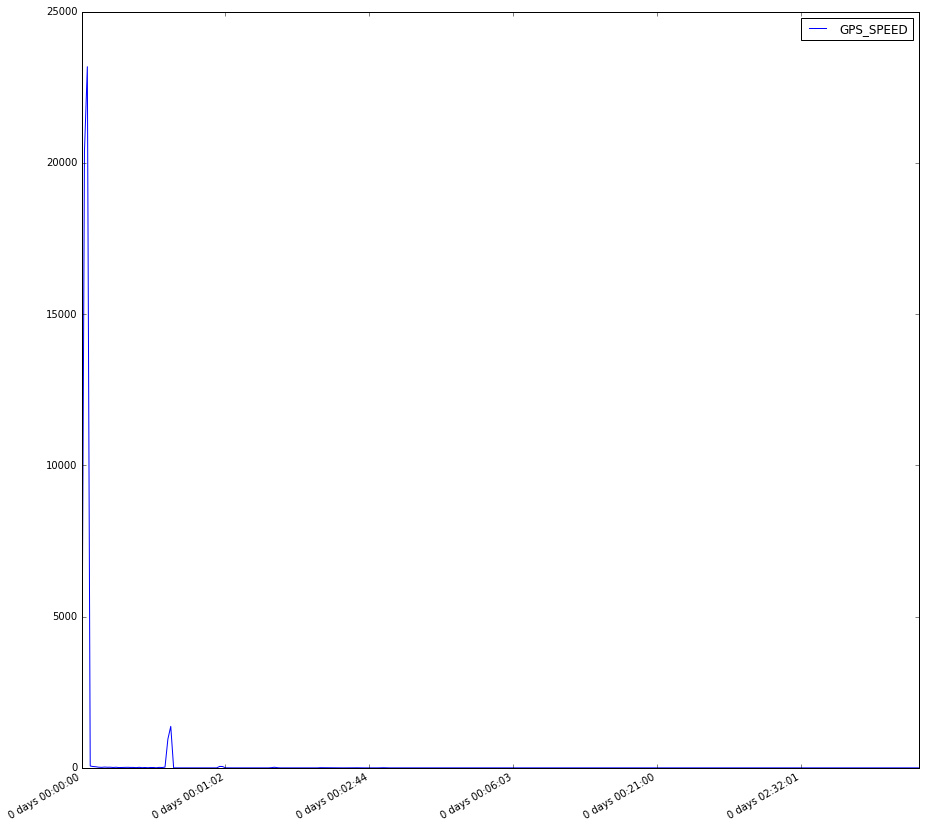

In [5]:
#Delai d'envoi pour chaque colonne
delai(df_asset[df_asset['GPS_SPEED'].notnull()],'GPS_SPEED')

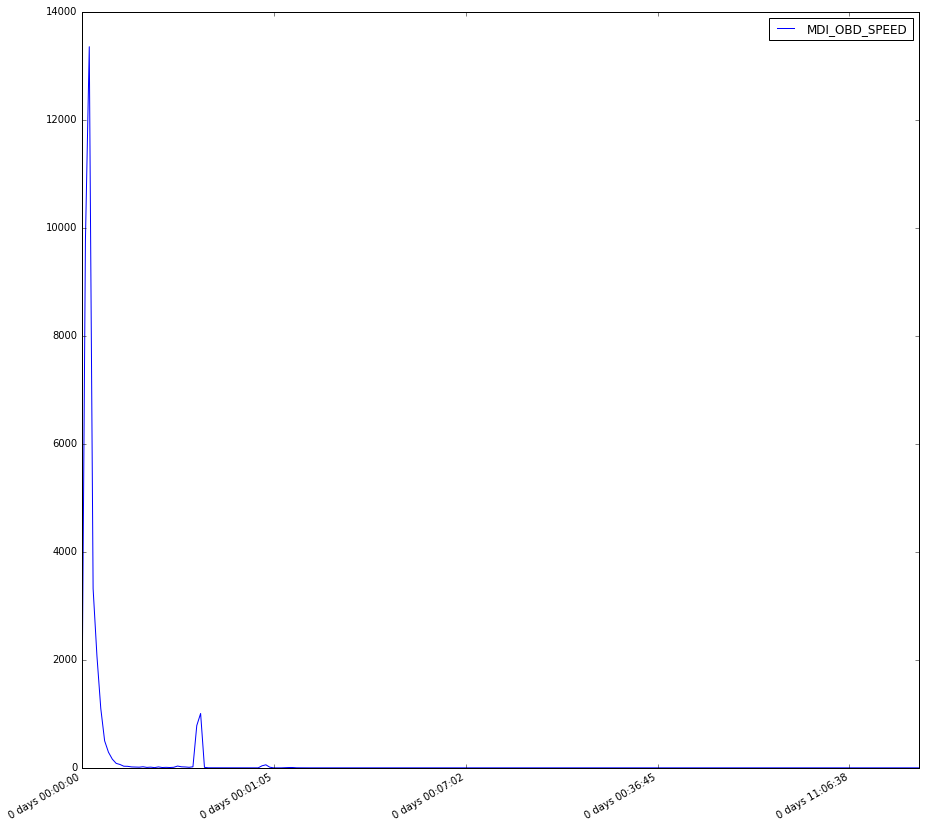

In [6]:
delai(df_asset[df_asset['MDI_OBD_SPEED'].notnull()],'MDI_OBD_SPEED')


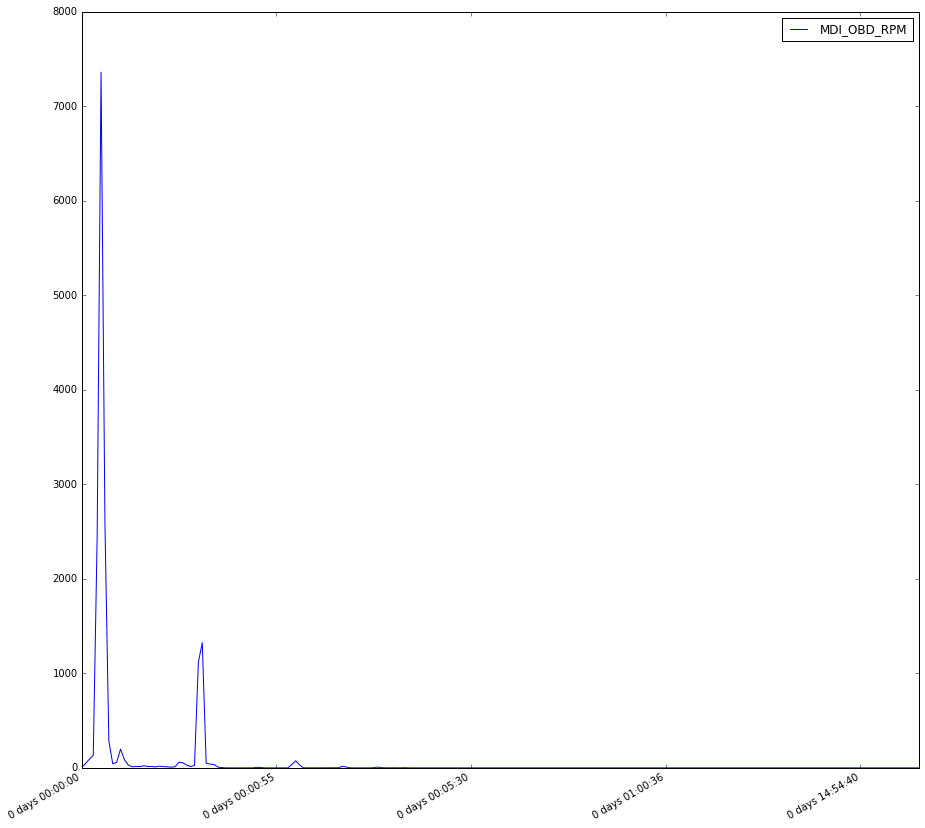

In [7]:
delai(df_asset[df_asset['MDI_OBD_RPM'].notnull()],'MDI_OBD_RPM')


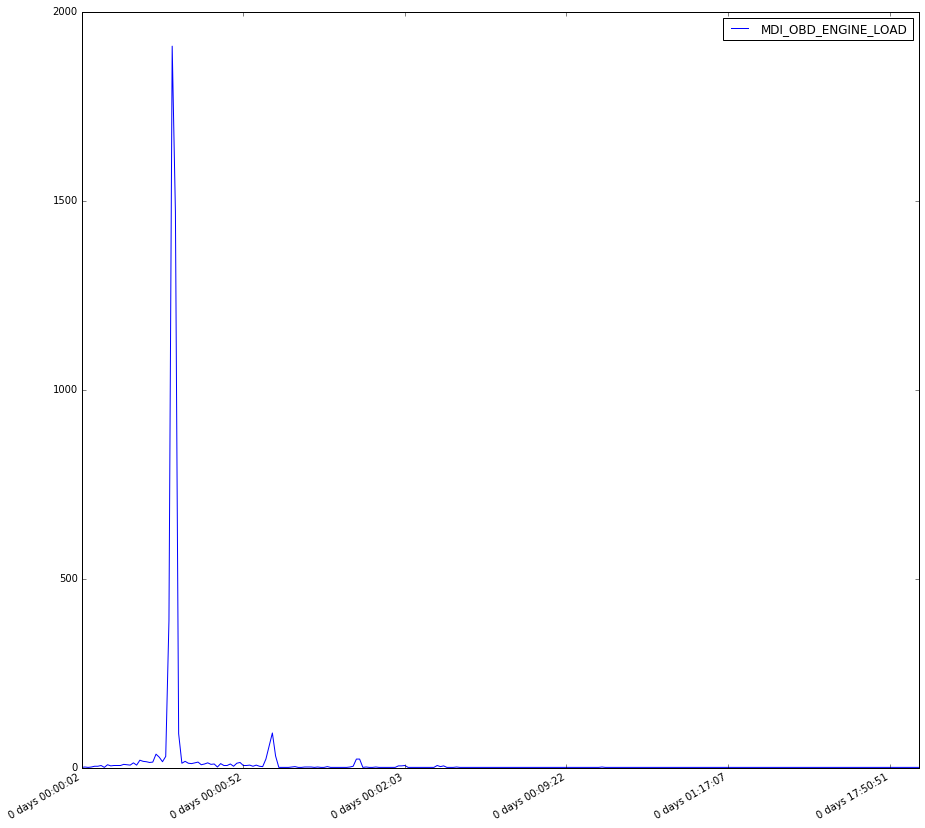

In [8]:
delai(df_asset[df_asset['MDI_OBD_ENGINE_LOAD'].notnull()],'MDI_OBD_ENGINE_LOAD')


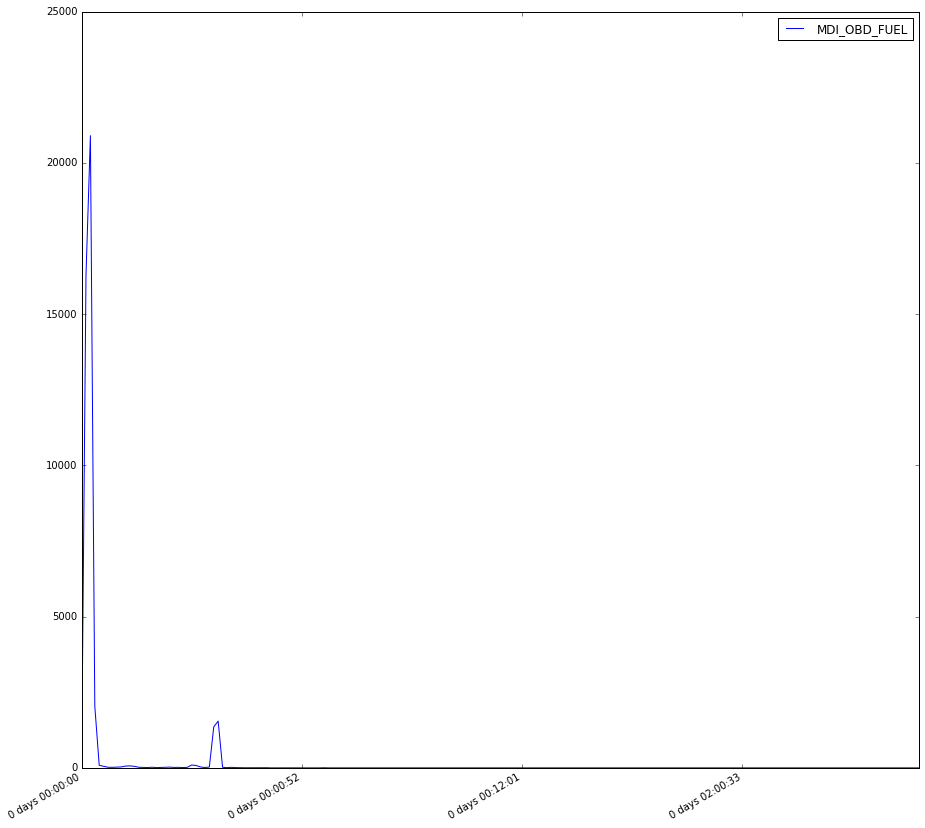

In [9]:
delai(df_asset[df_asset['MDI_OBD_FUEL'].notnull()],'MDI_OBD_FUEL')


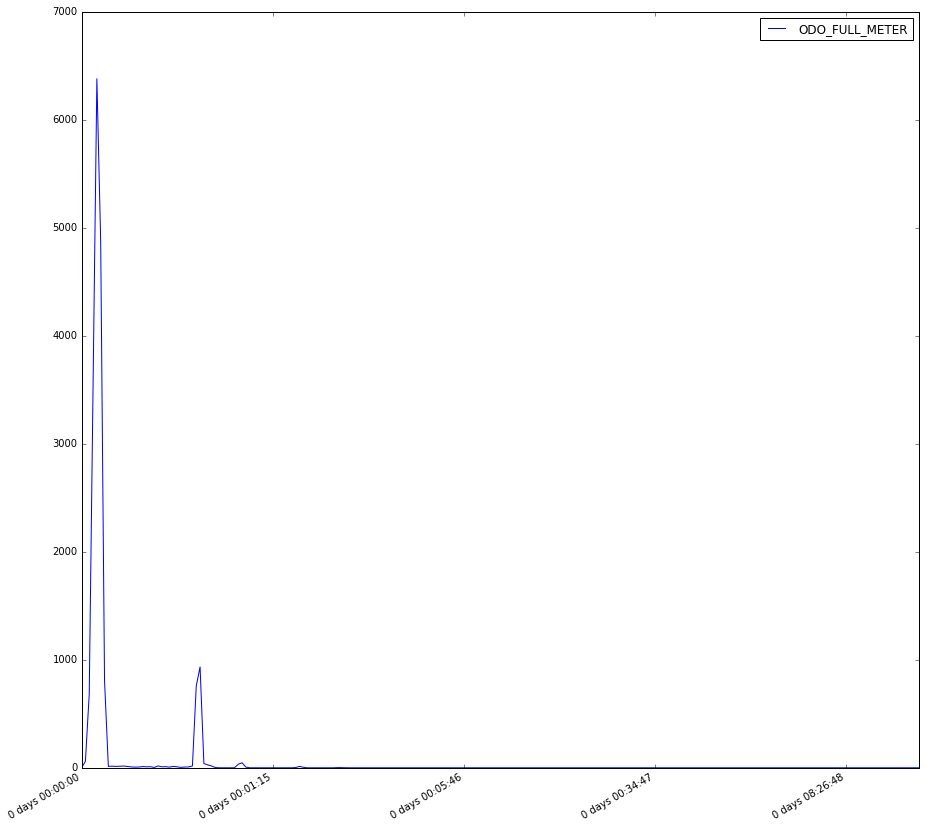

In [10]:
delai(df_asset[df_asset['ODO_FULL_METER'].notnull()],'ODO_FULL_METER')

In [11]:
def update(df):
    update_by_delay=pd.DataFrame([],columns=['update_sum','send_delay'])
    df=df.reset_index()
    for i in range(1,len(df)):
        update_by_delay=update_by_delay.append(pd.DataFrame([[df.iloc[i].notnull().sum(),df['recorded_at'][i]-df['recorded_at'][i-1]]],columns=['update_sum','send_delay']))
      #Delai d'envoi
    
    return update_by_delay

In [30]:
#Takes a dataframe and returns another
#Adds a colmn containing time difference between each line
def delay_col(df):
    df['delay']= pd.Series(np.empty(len(df)), index=df.index)
    for i in range(1,len(df)):
        df['delay'][i]=df['recorded_at'][i]-df['recorded_at'][i-1]
    df['delay'][0]=np.nan
    return df

In [31]:
df_asset=delay_col(df_asset)

/homes/wsahel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/homes/wsahel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


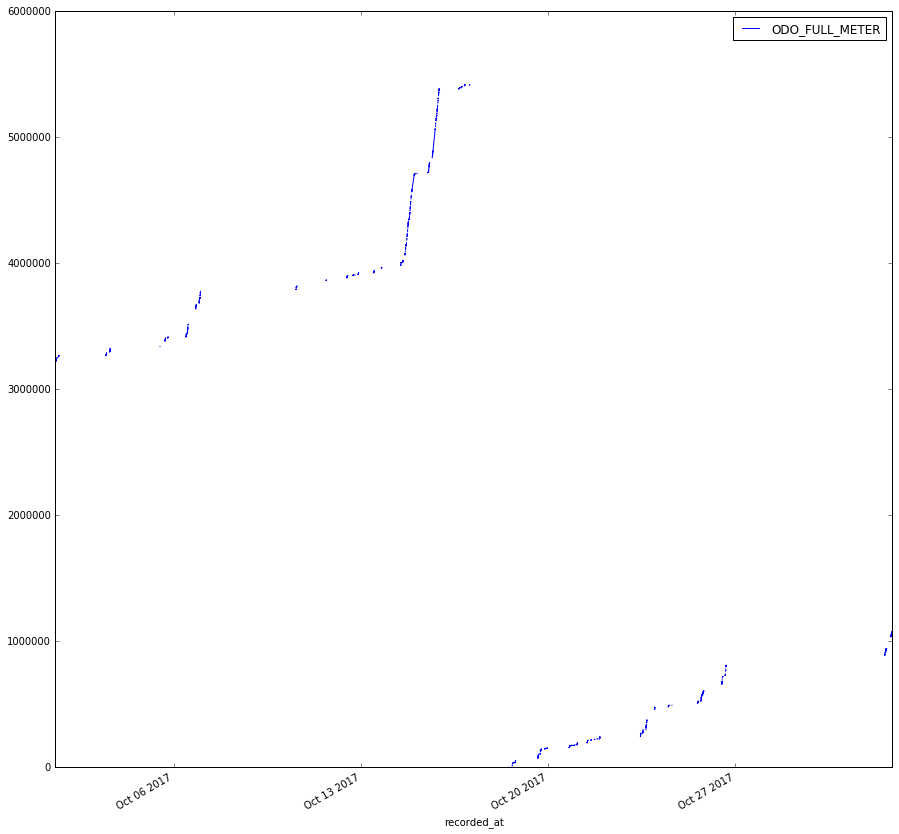

In [59]:
df_asset.plot(x='recorded_at',y='ODO_FULL_METER',figsize=(15,15))

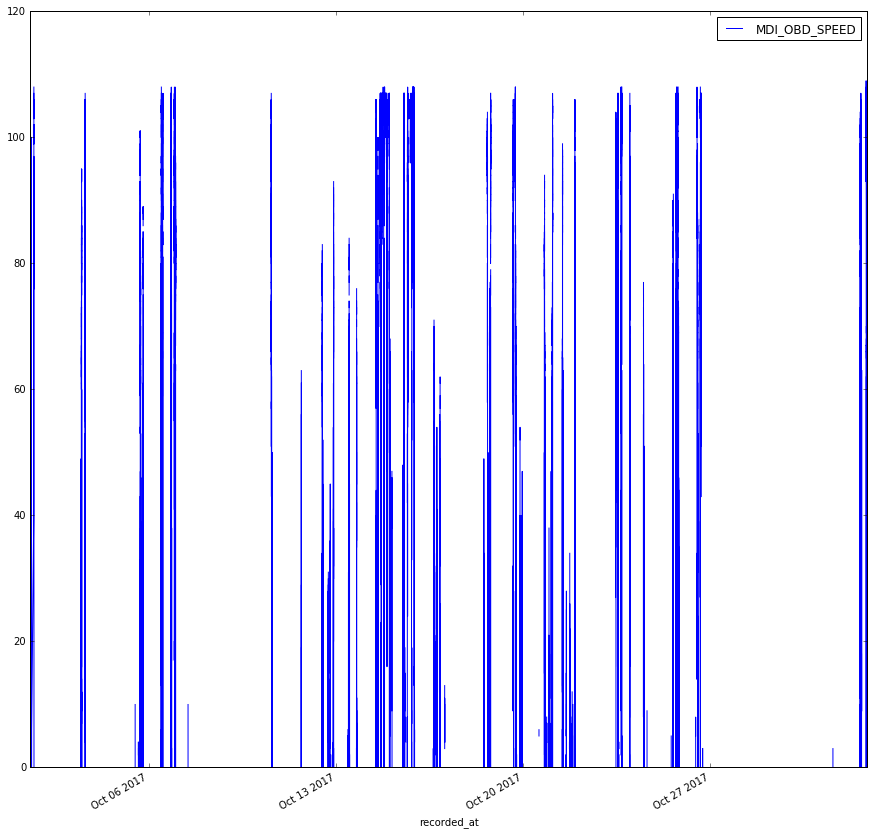

In [68]:
df_asset.plot(x='recorded_at',y='MDI_OBD_SPEED',figsize=(15,15))

In [79]:
#Takes a dataframe and time interval and returns a list of dataframes
#Divides each dataframe by ride (Each ride is seperated by the given interval)
def divise_asset_by_time(df,interval):
    df_list = []
    start_line = 0
    for i in range(1,len(df)):      
        if  df['delay'][i]> interval:
            df_list.append(df.iloc[start_line:i])
            start_line = i     
        if i == len(df)-1:    
            df_list.append(df.iloc[start_line:len(df)])
    return df_list

In [81]:
div_courses=divise_asset_by_time(df_asset,pd.Timedelta(minutes=5))

In [116]:
for idx,df in enumerate(div_courses):
    print((idx,len(df),df['recorded_at'].iloc[-1]-df['recorded_at'].iloc[0]))

(0, 13, Timedelta('0 days 00:01:06'))
(1, 522, Timedelta('0 days 00:32:36'))
(2, 320, Timedelta('0 days 00:24:09'))
(3, 21, Timedelta('0 days 00:08:37'))
(4, 2, Timedelta('0 days 00:00:30'))
(5, 431, Timedelta('0 days 01:05:53'))
(6, 3, Timedelta('0 days 00:00:42'))
(7, 614, Timedelta('0 days 00:50:57'))
(8, 22, Timedelta('0 days 00:10:03'))
(9, 27, Timedelta('0 days 00:10:18'))
(10, 53, Timedelta('0 days 00:21:54'))
(11, 4, Timedelta('0 days 00:00:55'))
(12, 49, Timedelta('0 days 00:15:24'))
(13, 364, Timedelta('0 days 00:43:51'))
(14, 2, Timedelta('0 days 00:00:30'))
(15, 143, Timedelta('0 days 00:36:40'))
(16, 43, Timedelta('0 days 00:12:01'))
(17, 2587, Timedelta('0 days 02:23:04'))
(18, 3, Timedelta('0 days 00:00:33'))
(19, 17, Timedelta('0 days 00:01:03'))
(20, 738, Timedelta('0 days 00:58:41'))
(21, 2338, Timedelta('0 days 01:32:56'))
(22, 44, Timedelta('0 days 00:11:47'))
(23, 20, Timedelta('0 days 00:08:12'))
(24, 639, Timedelta('0 days 00:53:02'))
(25, 3, Timedelta('0 days 00

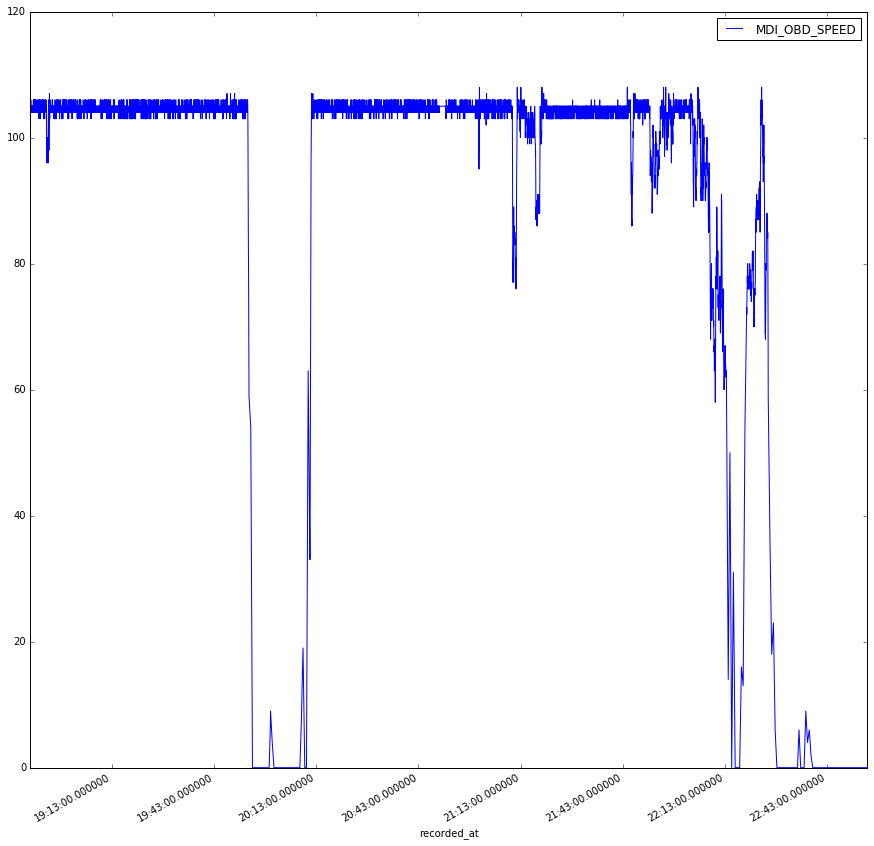

In [119]:
div_courses[51].plot(x='recorded_at',y='MDI_OBD_SPEED',figsize=(15,15))

In [98]:
#This function takes a list of dataframe and a string and returns a list of dataframes
#Fills forward the column for each dataframe in the list
def fill(div_list,column):
    div_list_filled=[]
    for df in div_list:
        df[column]=df[column].fillna(method='ffill')
        div_list_filled.append(df)
    return div_list_filled
        
    

In [99]:
div_courses_filled=fill(div_courses,'MDI_OBD_SPEED')

/homes/wsahel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


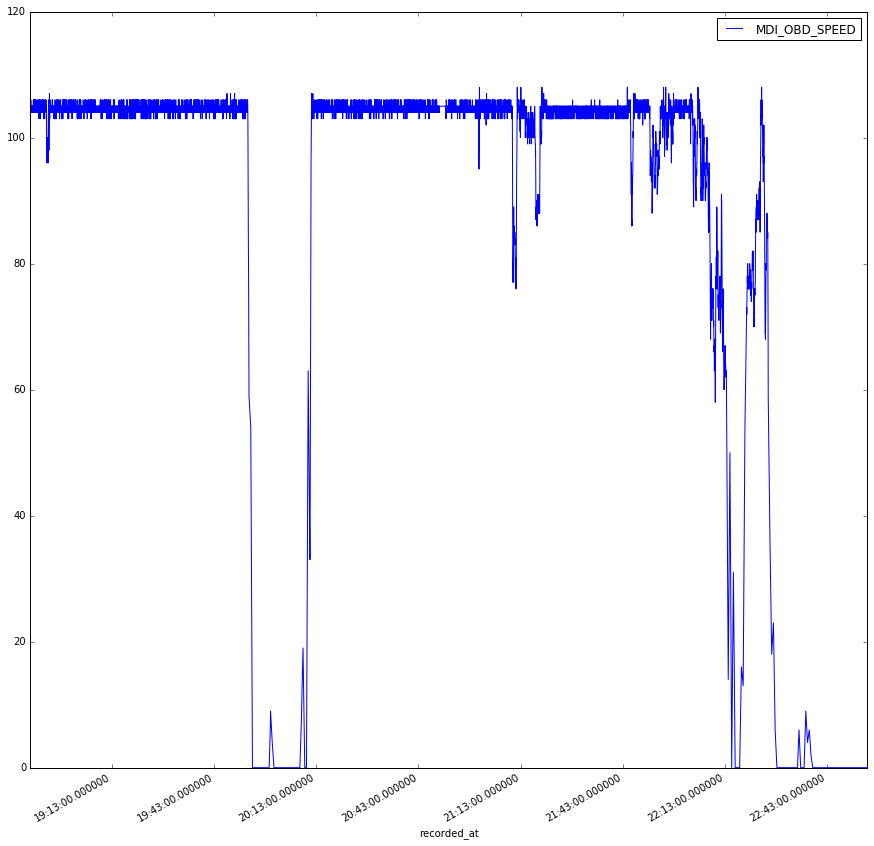

In [120]:
div_courses_filled[51].plot(x='recorded_at',y='MDI_OBD_SPEED',figsize=(15,15))

In [150]:
test=div_courses_filled[51]
#This function takes a dataframe and returns another
#Input dataframe is a separate ride
#Adds a cloumn for distance travelled between each line
def calcul_dist(df):
    df=df.reset_index()
    df['distance']= pd.Series(np.empty(len(df)), index=df.index)
    for i in range(1,len(df)):
        df['distance'][i] = (df['recorded_at'][i]-df['recorded_at'][i-1]).total_seconds()*df['MDI_OBD_SPEED'][i]/3600
    return df

In [151]:
calcul_dist(test)

/homes/wsahel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,asset,recorded_at,MDI_OBD_SPEED,GPS_SPEED,MDI_OBD_RPM,MDI_OBD_ENGINE_LOAD,MDI_OBD_FUEL,ODO_FULL_METER,MDI_DASHBOARD_MILEAGE,delay,distance
0,26989,487,2017-10-15 18:49:03,NaN,55992.0,NaN,NaN,3618573.0,5063840.0,NaN,0 days 02:01:50,6.918381e-310
1,26990,487,2017-10-15 18:49:05,105.0,55529.0,2458.0,NaN,3618587.0,NaN,NaN,0 days 00:00:02,5.833333e-02
2,26991,487,2017-10-15 18:49:06,105.0,55282.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:01,2.916667e-02
3,26992,487,2017-10-15 18:49:08,104.0,55286.0,NaN,NaN,3618601.0,5063952.0,NaN,0 days 00:00:02,5.777778e-02
4,26993,487,2017-10-15 18:49:10,105.0,55429.0,2437.0,NaN,3618615.0,NaN,NaN,0 days 00:00:02,5.833333e-02
5,26994,487,2017-10-15 18:49:11,105.0,55337.0,NaN,NaN,NaN,5064064.0,NaN,0 days 00:00:01,2.916667e-02
6,26995,487,2017-10-15 18:49:13,106.0,55534.0,NaN,NaN,3618629.0,NaN,NaN,0 days 00:00:02,5.888889e-02
7,26996,487,2017-10-15 18:49:15,106.0,55417.0,2453.0,NaN,3618636.0,NaN,NaN,0 days 00:00:02,5.888889e-02
8,26997,487,2017-10-15 18:49:17,105.0,55550.0,NaN,NaN,3618647.0,5064176.0,NaN,0 days 00:00:02,5.833333e-02
9,26998,487,2017-10-15 18:49:18,105.0,55660.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:01,2.916667e-02


In [1]:
df.head(10)

NameError: name 'df' is not defined